# Тестирование модели 


In [49]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [50]:
# Функция для создания датасета
def create_dataset(n_samples, noise_level=0):
    xs = np.linspace(0, 10, n_samples)
    ys = xs + np.random.random(n_samples) * noise_level * 2 - noise_level
    return xs.reshape(-1, 1), ys


# Функция для обучения и тестирования модели
def train_and_evaluate(dataset):
    xs, ys = dataset
    model = LinearRegression()
    model.fit(xs, ys)
    predictions = model.predict(xs)
    mse = mean_squared_error(ys, predictions)
    return mse, model

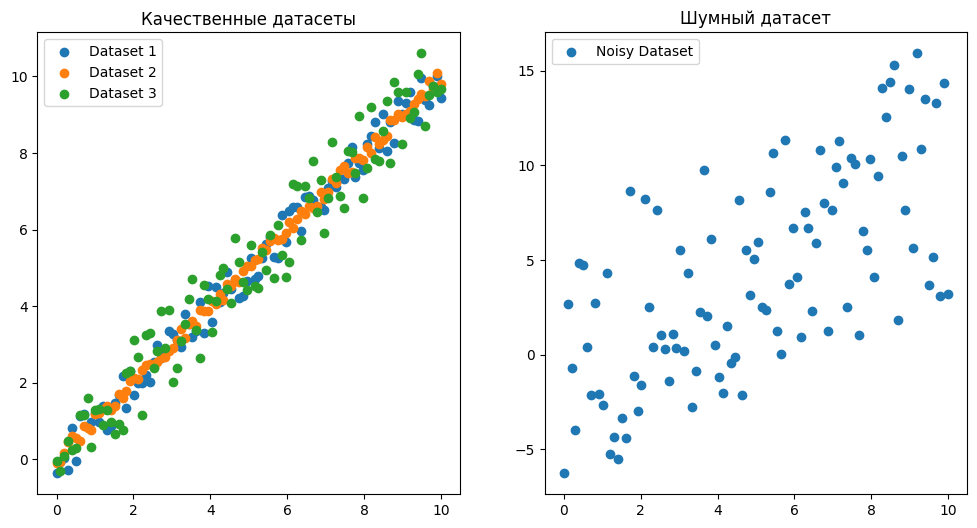

In [51]:
# Создаем три качественных датасета с минимальным уровнем шума
dataset1 = create_dataset(100, 0.6)
dataset2 = create_dataset(100, 0.2)
dataset3 = create_dataset(100, 1.2)

# Создаем датасет с шумом
noisy_dataset = create_dataset(100, 7)

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(*dataset1, label='Dataset 1')
plt.scatter(*dataset2, label='Dataset 2')
plt.scatter(*dataset3, label='Dataset 3')
plt.legend()
plt.title('Качественные датасеты')

plt.subplot(1, 2, 2)
plt.scatter(*noisy_dataset, label='Noisy Dataset')
plt.legend()
plt.title('Шумный датасет')
plt.show()

In [52]:
# Обучение модели на первом качественном датасете
mse, model = train_and_evaluate(dataset1)
print(f"Среднеквадратичная ошибка на датасете 1: {mse}\n")

Среднеквадратичная ошибка на датасете 1: 0.12257315383926116



In [53]:
# Тестирование модели и вывод результатов
def run_tests():
    results = []

    mse1, _ = train_and_evaluate(dataset1)
    results.append(('dataset1', mse1, mse1 < 1))

    mse2, _ = train_and_evaluate(dataset2)
    results.append(('dataset2', mse2, mse2 < 1))

    mse3, _ = train_and_evaluate(dataset3)
    results.append(('dataset3', mse3, mse3 < 1))

    mse_noisy, _ = train_and_evaluate(noisy_dataset)
    results.append(('noisy_dataset', mse_noisy, mse_noisy > 1))

    return results

# Запуск тестов и вывод результатов
test_results = run_tests()
for dataset_name, mse, passed in test_results:
    status = "пройден" if passed else "не пройден"
    print(f"Тест на {dataset_name} со среднеквадратичной ошибкой {mse:.2f} {status}.")

Тест на dataset1 со среднеквадратичной ошибкой 0.12 пройден.
Тест на dataset2 со среднеквадратичной ошибкой 0.01 пройден.
Тест на dataset3 со среднеквадратичной ошибкой 0.44 пройден.
Тест на noisy_dataset со среднеквадратичной ошибкой 15.79 пройден.
